## Asignacion de Librerias y carga del dataset

In [14]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [15]:
data = cifar10.load_data()

In [16]:
(X_train, y_train), (X_test, y_test) = data

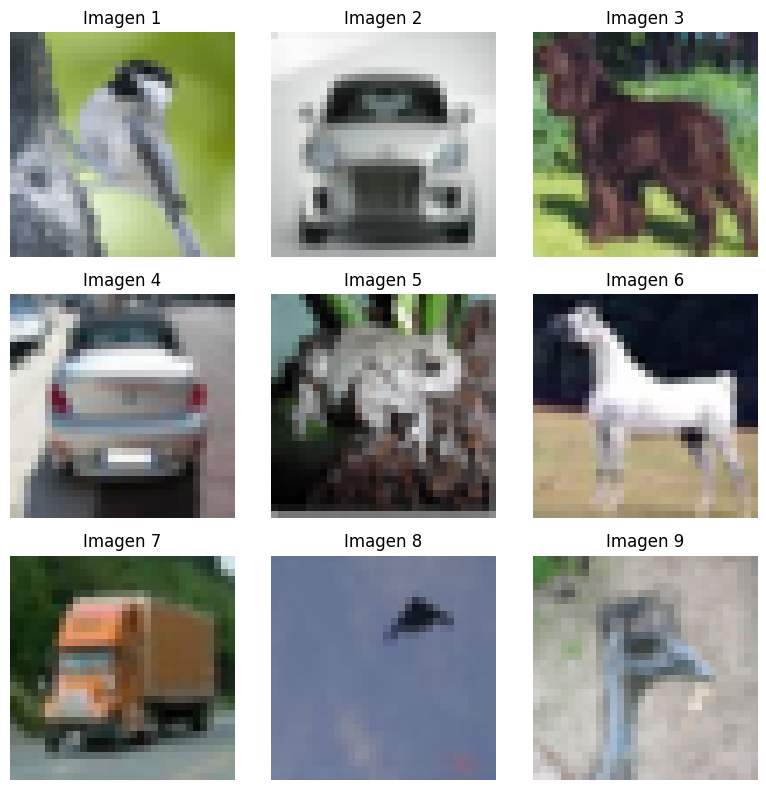

In [17]:
# Seleccionar imágenes aleatorias
n_images = 9
indices = np.random.choice(len(X_train), n_images, replace=False)

plt.figure(figsize=(8, 8))

for i, idx in enumerate(indices):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[idx])
    plt.title(f"Imagen {i+1}")
    plt.axis("off")

plt.tight_layout()
plt.show()

In [18]:
## Normalizar imagenes
X_train = X_train.astype("float32") / 255.0
X_test  = X_test.astype("float32") / 255.0

In [19]:
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

## Definicion del Modelo CNN

In [20]:
model = Sequential([
    Conv2D(32, (3,3), activation="relu", padding="same", input_shape=(32,32,3)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation="relu", padding="same"),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation="relu", padding="same"),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(10, activation="softmax")
])

## Compilar modelo y resumen

In [21]:
model.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

## Entrenamiento del modelo

In [22]:
history = model.fit(X_train, y_train,epochs=10,batch_size=64,validation_split=0.2,verbose=1)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.3616 - loss: 1.7268 - val_accuracy: 0.5121 - val_loss: 1.3581
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.5049 - loss: 1.3737 - val_accuracy: 0.5861 - val_loss: 1.1487
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.5787 - loss: 1.1898 - val_accuracy: 0.6467 - val_loss: 0.9821
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.6346 - loss: 1.0452 - val_accuracy: 0.6853 - val_loss: 0.9026
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.6697 - loss: 0.9471 - val_accuracy: 0.6758 - val_loss: 0.9094
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.6971 - loss: 0.8758 - val_accuracy: 0.7230 - val_loss: 0.7943
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.7195 - loss: 0.8077 - val_accuracy: 0.7336 - val_loss: 0.7704
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.7418 - loss: 0.7515 - 

## Graficos y Analisis

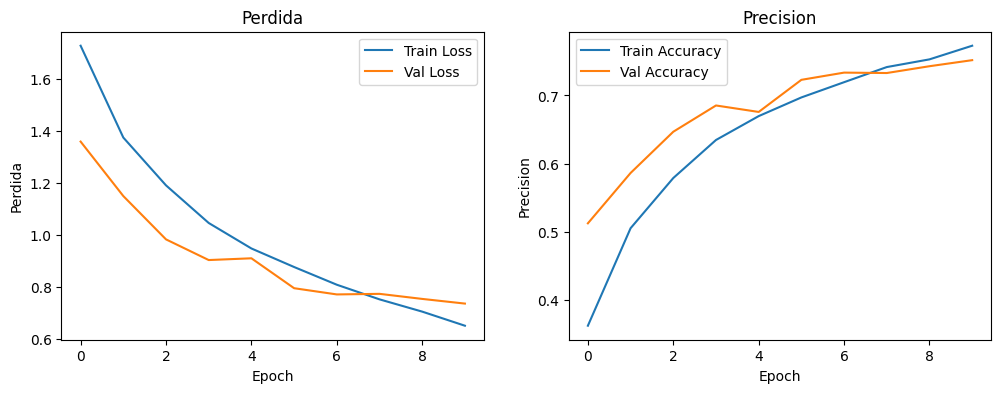

In [23]:
plt.figure(figsize=(12,4))
# Perdida
plt.subplot(1,2,1)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Perdida")
plt.xlabel("Epoch")
plt.ylabel("Perdida")
plt.legend()

# Precisión
plt.subplot(1,2,2)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.title("Precision")
plt.xlabel("Epoch")
plt.ylabel("Precision")
plt.legend()

plt.show()


## Evaluacion del modelo

In [24]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Precision en el conjunto de test: {test_accuracy:.4f}")

Precision en el conjunto de test: 0.7474


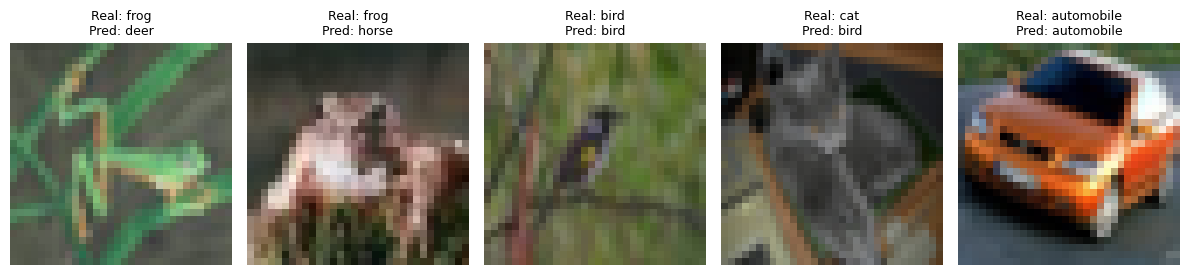

In [25]:
# Etiquetas descriptivas de CIFAR-10
# Fuente: https://keras-io.translate.goog/api/datasets/cifar10/?_x_tr_sl=en&_x_tr_tl=es&_x_tr_hl=es&_x_tr_pto=tc
class_names = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

# Seleccionamos 5 imagenes aleatorias del set de prueba
n_images = 5
indices = np.random.choice(X_test.shape[0], n_images, replace=False)

plt.figure(figsize=(12, 4))

# Mostramos la la imagen original y su prediccion
for i, idx in enumerate(indices):
    img = X_test[idx]
    true_label_idx = np.argmax(y_test[idx])
    true_label = class_names[true_label_idx]

    # Preparar imagen para el modelo
    img_input = np.expand_dims(img, axis=0)

    # Predicción
    pred_probs = model.predict(img_input, verbose=0)
    pred_label_idx = np.argmax(pred_probs)
    pred_label = class_names[pred_label_idx]

    # Mostrar imagen
    plt.subplot(1, n_images, i + 1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(
        f"Real: {true_label}\nPred: {pred_label}",
        fontsize=9
    )

plt.tight_layout()
plt.show()